# Loading preliminaries & the dataset

In [1]:
# Preliminaries:
import random
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Get the Wisconsin Breast Cancer dataset
bcancer = datasets.load_breast_cancer()
bcancer_df = pd.DataFrame(data=bcancer.data, columns=bcancer.feature_names)

# Add the outcome / target variable (malignant or benign)
bcancer_df = bcancer_df.assign(target=pd.Series(bcancer.target))
bcancer_df.replace(to_replace={'target': {0: bcancer.target_names[0]}}, inplace=True)
bcancer_df.replace(to_replace={'target': {1: bcancer.target_names[1]}}, inplace=True)
bcancer_df["target"] = bcancer_df["target"].astype("category")
bcancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


In [3]:
bcancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

# Initial EDA

In [4]:
# Check data types
bcancer_df.dtypes

mean radius                 float64
mean texture                float64
mean perimeter              float64
mean area                   float64
mean smoothness             float64
mean compactness            float64
mean concavity              float64
mean concave points         float64
mean symmetry               float64
mean fractal dimension      float64
radius error                float64
texture error               float64
perimeter error             float64
area error                  float64
smoothness error            float64
compactness error           float64
concavity error             float64
concave points error        float64
symmetry error              float64
fractal dimension error     float64
worst radius                float64
worst texture               float64
worst perimeter             float64
worst area                  float64
worst smoothness            float64
worst compactness           float64
worst concavity             float64
worst concave points        

In [5]:
# Check df shape
bcancer_df.shape

(569, 31)

In [6]:
# Check duplicates
bcancer_df.duplicated().sum()

0

In [7]:
# Check missing values
bcancer_df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

# Data Visualization
There are no missing and duplicate values, so no need for data cleaning. We can proceed to data vis.

In [13]:
palette=['#9EC7CF','#ED99B5']

Text(0.5, 1.0, 'Number of Patients by Outcome')

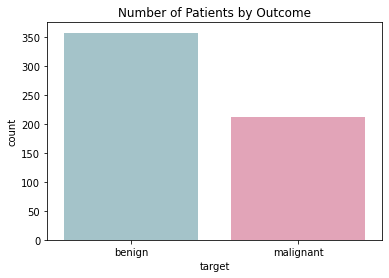

In [14]:
sns.countplot(bcancer_df['target'],palette=palette)
plt.title('Number of Patients by Outcome')

In [15]:
bcancer_df['target'].value_counts()

benign       357
malignant    212
Name: target, dtype: int64

<ipython-input-16-45a5550d9846>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.subplots()
<ipython-input-16-45a5550d9846>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.subplots()
<ipython-input-16-45a5550d9846>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.subplots()
<ipython-input-16-45a5550d9846>:2: Ru

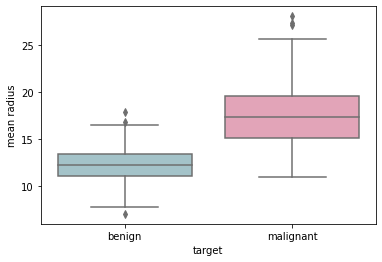

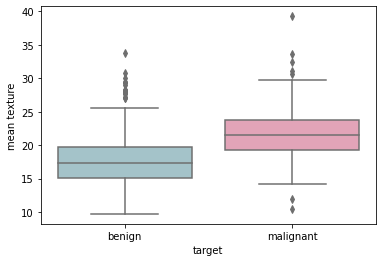

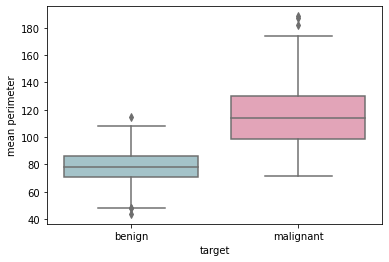

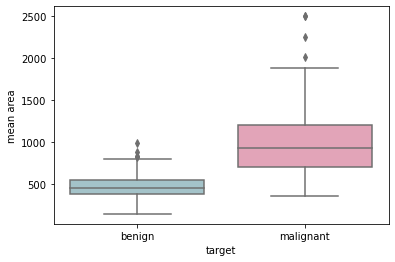

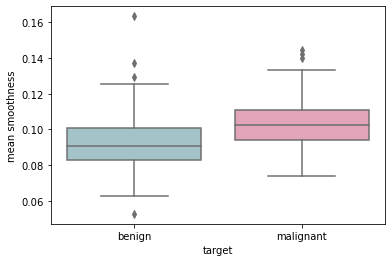

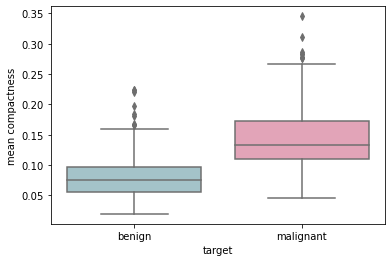

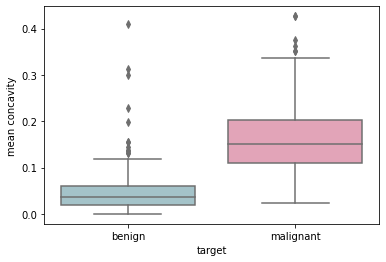

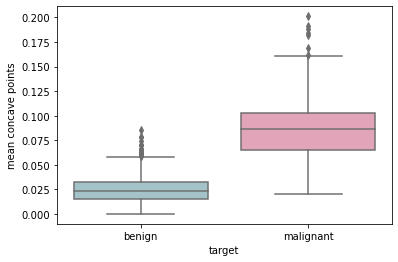

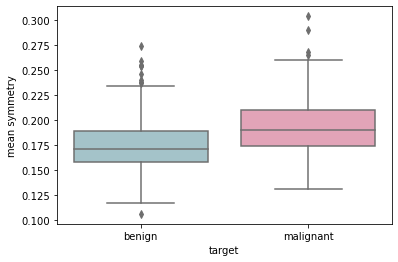

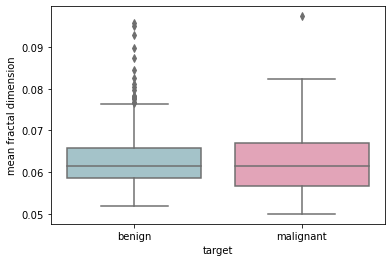

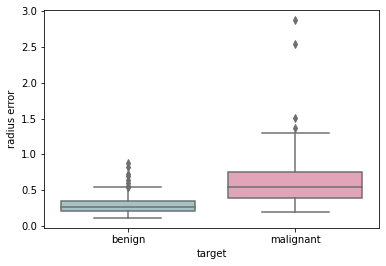

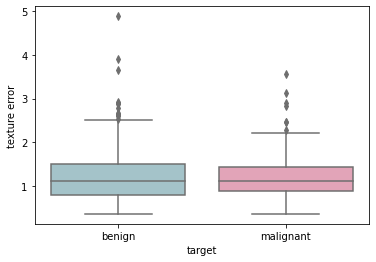

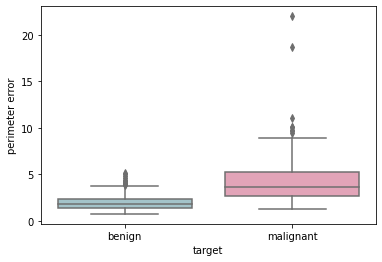

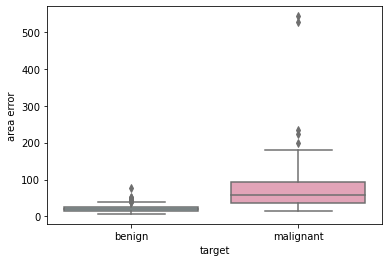

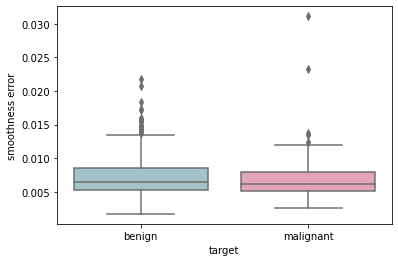

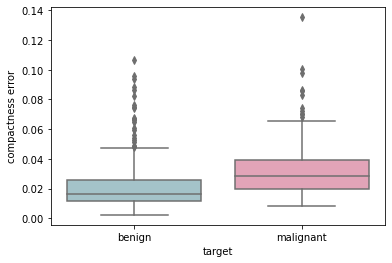

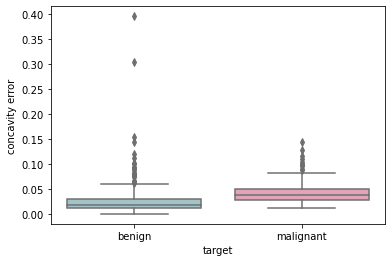

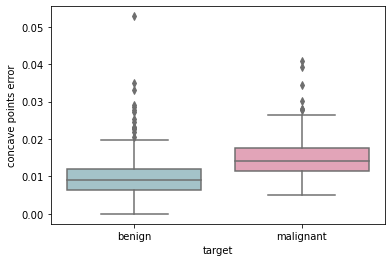

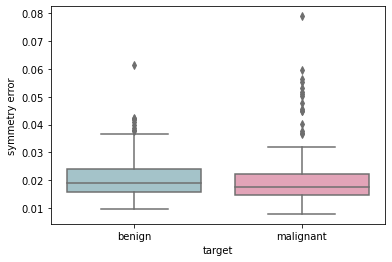

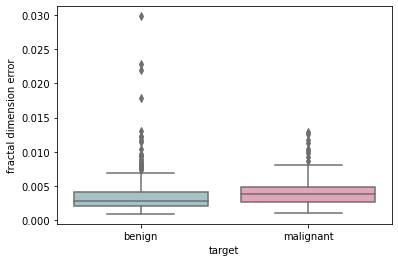

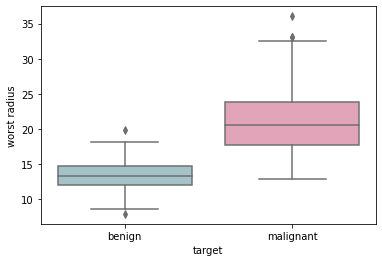

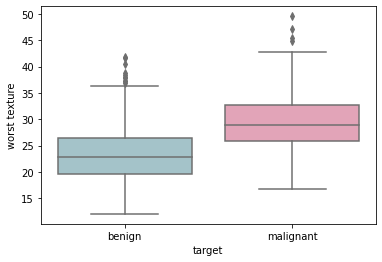

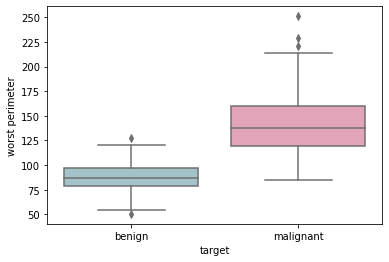

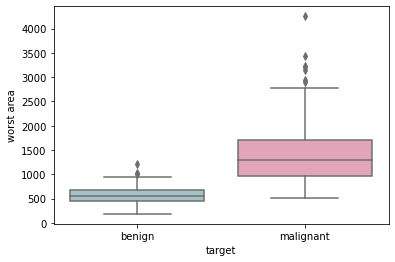

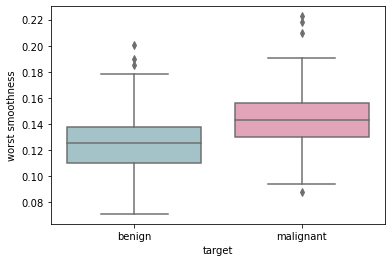

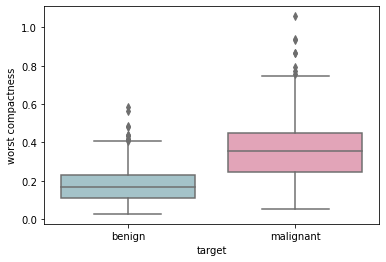

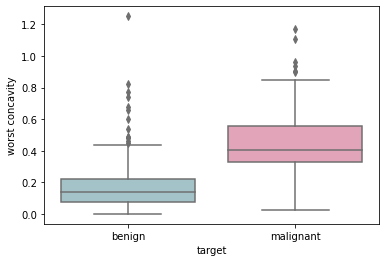

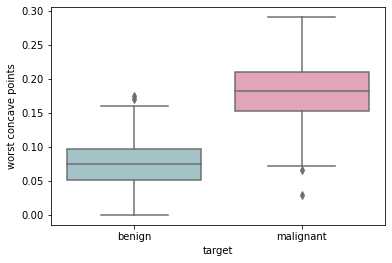

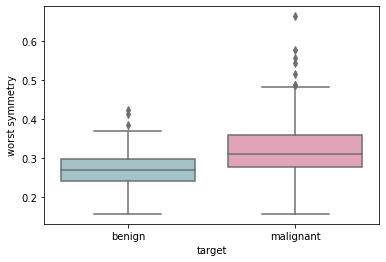

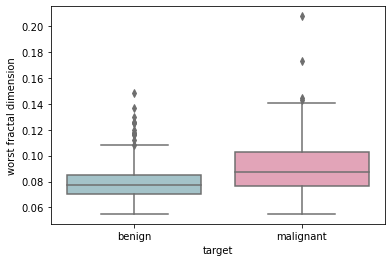

In [16]:
for i in bcancer.feature_names:
    plt.subplots()
    ax = sns.boxplot(x='target', y=i, data=bcancer_df, palette=palette)

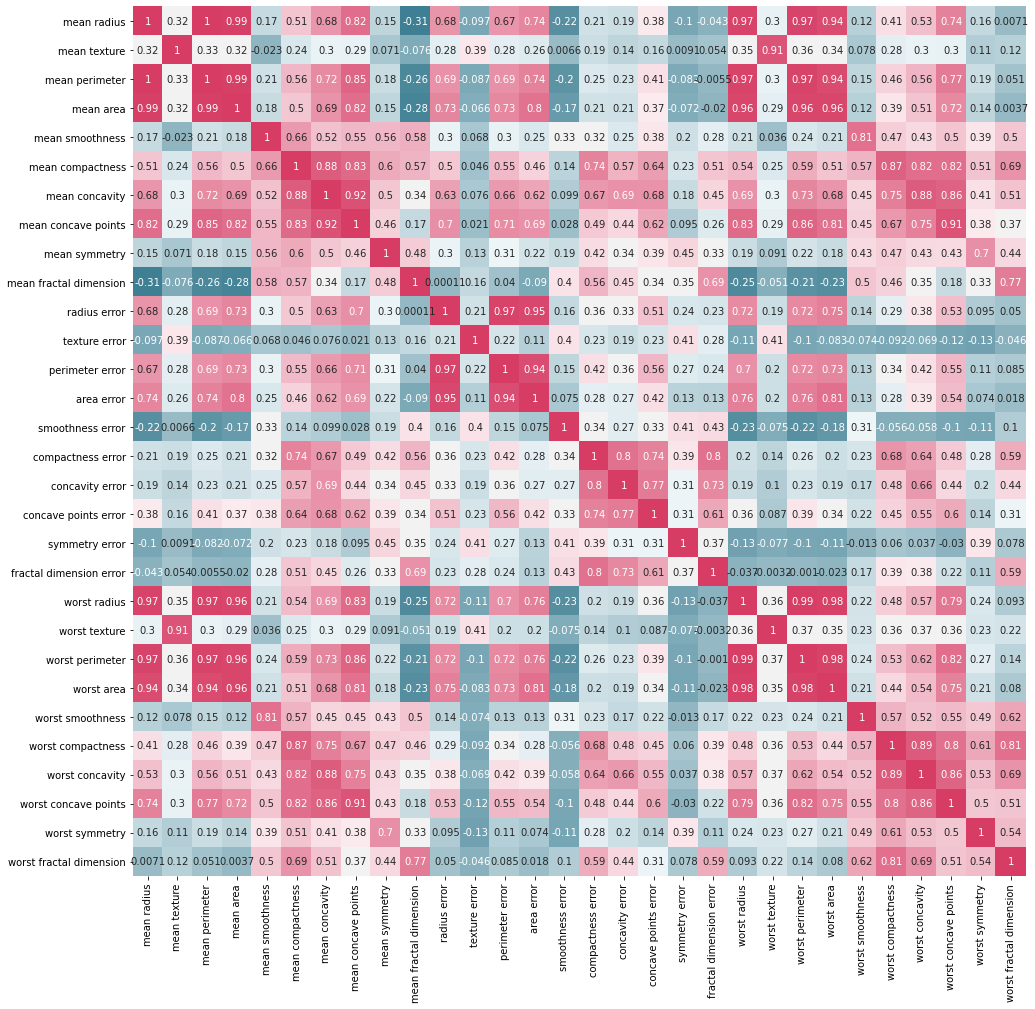

In [45]:
plt.figure(figsize = (16,16))
corrMatrix = bcancer_df.corr()
ax = sns.heatmap(corrMatrix, annot=True, cmap=sns.diverging_palette(220, 362, as_cmap=True),cbar=False)
plt.show()

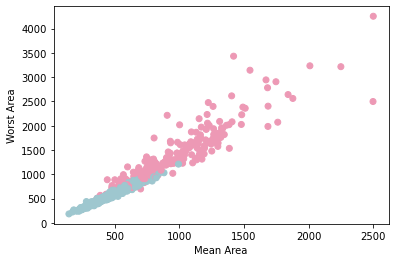

In [209]:
fig, ax = plt.subplots()
colors = {'benign':palette[0], 'malignant':palette[1]}
ax.scatter(bcancer_df['mean area'], bcancer_df['worst area'], c=bcancer_df['target'].map(colors))
plt.xlabel('Mean Area')
plt.ylabel('Worst Area')
plt.show()

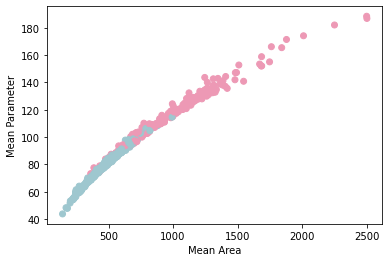

In [212]:
fig, ax = plt.subplots()
colors = {'benign':palette[0], 'malignant':palette[1]}
ax.scatter(bcancer_df['mean area'], bcancer_df['mean perimeter'], c=bcancer_df['target'].map(colors))
plt.xlabel('Mean Area')
plt.ylabel('Mean Parameter')
plt.show()

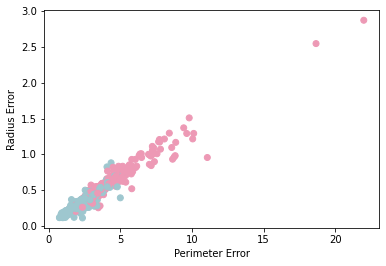

In [211]:
fig, ax = plt.subplots()
colors = {'benign':palette[0], 'malignant':palette[1]}
ax.scatter(bcancer_df['perimeter error'], bcancer_df['radius error'], c=bcancer_df['target'].map(colors))
plt.xlabel('Perimeter Error')
plt.ylabel('Radius Error')
plt.show()

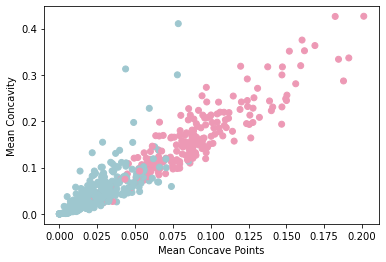

In [213]:
fig, ax = plt.subplots()
colors = {'benign':palette[0], 'malignant':palette[1]}
ax.scatter(bcancer_df['mean concave points'], bcancer_df['mean concavity'], c=bcancer_df['target'].map(colors))
plt.xlabel('Mean Concave Points')
plt.ylabel('Mean Concavity')
#plt.title('Mean Concave Points vs Mean Concavity')
plt.show()

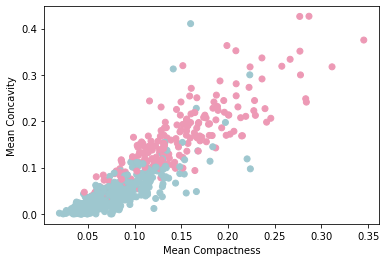

In [214]:
fig, ax = plt.subplots()
colors = {'benign':palette[0], 'malignant':palette[1]}
ax.scatter(bcancer_df['mean compactness'], bcancer_df['mean concavity'], c=bcancer_df['target'].map(colors))
plt.xlabel('Mean Compactness')
plt.ylabel('Mean Concavity')
plt.show()

# Preprocessing
All features are numeric; no need to handle imbalance

In [116]:
X = bcancer_df.drop(columns='target')
y = bcancer_df['target']

#### Train test split

In [117]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [119]:
# Check shape of train test
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape,'\n')

print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (398, 30)
y_train shape: (398,) 

X_test shape: (171, 30)
y_test shape: (171,)


#### Feature scaling

In [120]:
X_train[['mean area','mean concave points']].head()

,mean area,mean concave points
149,585.0,0.01329
124,553.5,0.02800
421,656.1,0.06300
195,516.4,0.02377
545,573.2,0.02443


In [121]:
print("mean 'mean area':", round(X_train['mean area'].mean(),4))
print("mean 'mean concave points':", round(X_train['mean concave points'].mean(),4))

print("sd 'mean area':", round(X_train['mean area'].std(),4))
print("sd 'mean concave points':", round(X_train['mean concave points'].std(),4))

mean 'mean area': 659.7709
mean 'mean concave points': 0.0484
sd 'mean area': 358.8655
sd 'mean concave points': 0.0377


In [122]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

X_train = pd.DataFrame(StandardScaler().fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(StandardScaler().fit_transform(X_test), columns=X_test.columns)
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,-0.123490,-0.296801,-0.170507,-0.208616,-1.201680,-0.773170,-0.762312,-0.933241,-1.229949,-0.948166,...,-0.197620,-0.506748,-0.307910,-0.273576,-1.507424,-0.449260,-0.572239,-0.840822,-0.856362,-0.765748
1,-0.228268,-0.657951,-0.253775,-0.296503,-1.804637,-0.587616,-0.091985,-0.542684,-1.419985,-0.612491,...,-0.422917,-0.458495,-0.465287,-0.438127,-1.273017,0.027042,0.318045,-0.377067,-1.341582,-0.414807
2,0.145534,-1.230564,0.245833,-0.010242,0.519184,1.570006,0.732320,0.386583,1.054201,1.574228,...,0.036022,-1.192272,0.203869,-0.127445,-0.024877,0.770802,0.272612,-0.047627,-0.089971,0.488264
3,-0.358532,-0.672207,-0.400937,-0.400014,-1.203862,-0.970650,-0.634704,-0.654992,0.096572,-0.827986,...,-0.502189,-0.583287,-0.501000,-0.493386,-0.959895,-0.663496,-0.470142,-0.493515,0.226547,-0.802899
4,-0.157472,0.967224,-0.208843,-0.241538,-0.254695,-0.700630,-0.750349,-0.637469,-0.518248,-0.642882,...,-0.195534,0.596414,-0.296107,-0.266734,-0.442374,-0.656085,-0.835138,-0.659802,-0.387208,-0.800613


In [123]:
X_train[['mean area','mean concave points']].head()

,mean area,mean concave points
0,-0.208616,-0.933241
1,-0.296503,-0.542684
2,-0.010242,0.386583
3,-0.400014,-0.654992
4,-0.241538,-0.637469


In [124]:
print("mean 'mean area':", round(X_train['mean area'].mean(),4))
print("mean 'mean concave points':", round(X_train['mean concave points'].mean(),4))

print("sd 'mean area':", round(X_train['mean area'].std(),4))
print("sd 'mean concave points':", round(X_train['mean concave points'].std(),4))

mean 'mean area': 0.0
mean 'mean concave points': -0.0
sd 'mean area': 1.0013
sd 'mean concave points': 1.0013


#### Feature Selection

In [126]:
# Feature selection
from sklearn.feature_selection import SelectKBest, f_classif

# define feature selection
fs = SelectKBest(score_func=f_classif, k=20)

# apply feature selection
X_train = fs.fit_transform(X_train, y_train)
print(X_train.shape)

(398, 20)


In [127]:
mask = fs.get_support() #list of booleans
new_features = [] # The list of your K best features
feature_names = list(bcancer_df.drop(columns='target').columns.values)

for bool, feature in zip(mask, feature_names):
    if bool:
        new_features.append(feature)

X_train = pd.DataFrame(X_train, columns=new_features)
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean compactness,mean concavity,mean concave points,radius error,perimeter error,area error,concave points error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry
0,-0.123490,-0.296801,-0.170507,-0.208616,-0.773170,-0.762312,-0.933241,-0.533593,-0.616781,-0.391775,-0.979400,-0.197620,-0.506748,-0.307910,-0.273576,-1.507424,-0.449260,-0.572239,-0.840822,-0.856362
1,-0.228268,-0.657951,-0.253775,-0.296503,-0.587616,-0.091985,-0.542684,-0.830401,-0.782544,-0.531261,-0.248287,-0.422917,-0.458495,-0.465287,-0.438127,-1.273017,0.027042,0.318045,-0.377067,-1.341582
2,0.145534,-1.230564,0.245833,-0.010242,1.570006,0.732320,0.386583,0.487478,0.909184,0.181325,0.622238,0.036022,-1.192272,0.203869,-0.127445,-0.024877,0.770802,0.272612,-0.047627,-0.089971
3,-0.358532,-0.672207,-0.400937,-0.400014,-0.970650,-0.634704,-0.654992,-0.725949,-0.654670,-0.508935,-0.563090,-0.502189,-0.583287,-0.501000,-0.493386,-0.959895,-0.663496,-0.470142,-0.493515,0.226547
4,-0.157472,0.967224,-0.208843,-0.241538,-0.700630,-0.750349,-0.637469,-0.202659,-0.383292,-0.191661,-0.459655,-0.195534,0.596414,-0.296107,-0.266734,-0.442374,-0.656085,-0.835138,-0.659802,-0.387208


In [128]:
fs = SelectKBest(score_func=f_classif, k=20)

# apply feature selection
X_test = fs.fit_transform(X_test, y_test)
print(X_test.shape)

mask = fs.get_support() #list of booleans
new_features = [] # The list of your K best features
feature_names = list(bcancer_df.drop(columns='target').columns.values)

for bool, feature in zip(mask, feature_names):
    if bool:
        new_features.append(feature)

X_test = pd.DataFrame(X_test, columns=new_features)
X_test.head()

(171, 20)


,mean radius,mean texture,mean perimeter,mean area,mean compactness,mean concavity,mean concave points,radius error,perimeter error,area error,concave points error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst fractal dimension
0,-0.441809,-0.221639,-0.420045,-0.482548,-0.016992,-0.124485,-0.286991,-0.040822,-0.194242,-0.259318,-0.187083,-0.256006,-0.223890,-0.315504,-0.352839,0.396158,-0.162669,-0.058250,-0.213360,0.135392
1,1.409862,0.383034,1.328779,1.452397,-0.068514,0.208627,0.715347,1.567995,1.476295,1.546860,0.367084,1.758255,0.078415,1.692996,1.745945,-0.647669,-0.186625,-0.051437,0.895536,-0.988358
2,0.413909,-0.025288,0.427832,0.314598,0.276148,0.668667,0.748354,0.279548,0.139418,0.235623,-0.093890,0.617723,-0.011965,0.514063,0.491727,0.933752,-0.153543,0.418666,0.501548,-0.244738
3,-0.461842,-0.426915,-0.404412,-0.524644,0.441372,-0.155948,-0.535027,-0.939662,-0.357998,-0.667466,0.029258,-0.681669,-0.493471,-0.500683,-0.639190,0.503677,-0.019502,-0.172369,-0.611645,0.452081
4,-0.707968,-1.149845,-0.684981,-0.718407,0.093157,-0.275606,-0.584779,-0.523016,-0.679921,-0.518325,0.573440,-0.807942,-0.996793,-0.812094,-0.741647,0.033283,-0.310969,-0.430414,-0.676402,-0.184936


#### Proportional Chance Criterion

Division per class:              0
malignant  212
benign     357

1.25 * Proportion Chance Criterion: 66.55874240566344%


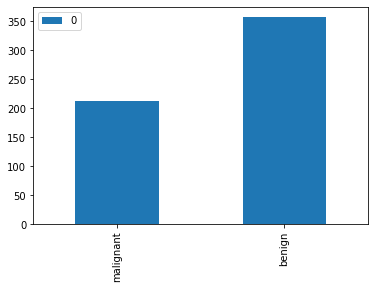

In [129]:
# Proportional Chance Criterion
from collections import Counter

counts = Counter(y)
df_target = pd.DataFrame.from_dict(counts, orient='index')
df_target.plot(kind='bar')

num = (df_target[0]/df_target[0].sum())**2
print("Division per class: {}\n".format(df_target))
print("1.25 * Proportion Chance Criterion: {}%".format(1.25*100*num.sum()))

In [130]:
counts = Counter(y)
df_target = pd.DataFrame.from_dict(counts, orient='index')
(df_target[0]/df_target[0].sum())**2

malignant    0.138818
benign       0.393651
Name: 0, dtype: float64

# Classification
* Logistic Regression
* SVM
* Random Forest
* Gradient Boosting

### Logistic Regression

In [132]:
# train the model on train set without using GridSearchCV 
from sklearn.metrics import classification_report

lr = LogisticRegression()
lr.fit(X_train, y_train) 
   
# print prediction results 
pred = lr.predict(X_test)

print(classification_report(y_test, pred))

tr_score = lr.score(X_train, y_train)
te_score = lr.score(X_test, y_test)

print('train score:', tr_score)
print('test score:', te_score)

              precision    recall  f1-score   support

      benign       0.97      0.99      0.98       108
   malignant       0.98      0.95      0.97        63

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

train score: 0.9849246231155779
test score: 0.9766081871345029


In [133]:
from sklearn.model_selection import GridSearchCV

param_grid = {#'penalty': ['l1','l2'],
              'tol': [0.0001, 0.001, 0.01, 0.1],  
              'max_iter': [1000, 5000, 10000, 15000]}  
   
grid = GridSearchCV(LogisticRegression(), param_grid, refit = True, verbose = 3) 
   
# fitting the model for grid search 
grid.fit(X_train, y_train) 
 
# print best parameter after tuning 
print(grid.best_params_) 
grid_predictions = grid.predict(X_test) 
   
# print classification report 
print(classification_report(y_test, grid_predictions))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] max_iter=1000, tol=0.0001 .......................................
[CV] ........... max_iter=1000, tol=0.0001, score=0.975, total=   0.0s
[CV] max_iter=1000, tol=0.0001 .......................................
[CV] ........... max_iter=1000, tol=0.0001, score=0.963, total=   0.0s
[CV] max_iter=1000, tol=0.0001 .......................................
[CV] ........... max_iter=1000, tol=0.0001, score=1.000, total=   0.0s
[CV] max_iter=1000, tol=0.0001 .......................................
[CV] ........... max_iter=1000, tol=0.0001, score=0.962, total=   0.0s
[CV] max_iter=1000, tol=0.0001 .......................................
[CV] ........... max_iter=1000, tol=0.0001, score=0.962, total=   0.0s
[CV] max_iter=1000, tol=0.001 ........................................
[CV] ............ max_iter=1000, tol=0.001, score=0.975, total=   0.0s
[CV] max_iter=1000, tol=0.001 ........................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ............. max_iter=1000, tol=0.01, score=0.962, total=   0.0s
[CV] max_iter=1000, tol=0.1 ..........................................
[CV] .............. max_iter=1000, tol=0.1, score=0.975, total=   0.0s
[CV] max_iter=1000, tol=0.1 ..........................................
[CV] .............. max_iter=1000, tol=0.1, score=0.963, total=   0.0s
[CV] max_iter=1000, tol=0.1 ..........................................
[CV] .............. max_iter=1000, tol=0.1, score=1.000, total=   0.0s
[CV] max_iter=1000, tol=0.1 ..........................................
[CV] .............. max_iter=1000, tol=0.1, score=0.962, total=   0.0s
[CV] max_iter=1000, tol=0.1 ..........................................
[CV] .............. max_iter=1000, tol=0.1, score=0.962, total=   0.0s
[CV] max_iter=5000, tol=0.0001 .......................................
[CV] ........... max_iter=5000, tol=0.0001, score=0.975, total=   0.0s
[CV] max_iter=5000, tol=0.0001 .......................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.9s finished


In [134]:
lr = LogisticRegression(max_iter=1000, tol=0.0001)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

tr_score = lr.score(X_train, y_train)
te_score = lr.score(X_test, y_test)

print('train score:', tr_score)
print('test score:', te_score)

train score: 0.9849246231155779
test score: 0.9766081871345029


### Support Vector Machines

In [143]:
# SVM
from sklearn.svm import SVC

# train the model on train set without using GridSearchCV 
svc = SVC()
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print(classification_report(y_test, pred))

tr_score = svc.score(X_train, y_train)
te_score = svc.score(X_test, y_test)

print('train score:', tr_score)
print('test score:', te_score)

              precision    recall  f1-score   support

      benign       0.97      0.99      0.98       108
   malignant       0.98      0.95      0.97        63

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

train score: 0.9798994974874372
test score: 0.9883040935672515


In [144]:
param_grid = {'kernel': ['linear', 'poly', 'rbf'], 'gamma':['scale','auto']}
   
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
   
# fitting the model for grid search 
grid.fit(X_train, y_train) 
 
# print best parameter after tuning 
print(grid.best_params_) 
grid_predictions = grid.predict(X_test) 
   
# print classification report 
print(classification_report(y_test, grid_predictions))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] gamma=scale, kernel=linear ......................................
[CV] .......... gamma=scale, kernel=linear, score=0.975, total=   0.0s
[CV] gamma=scale, kernel=linear ......................................
[CV] .......... gamma=scale, kernel=linear, score=0.950, total=   0.0s
[CV] gamma=scale, kernel=linear ......................................
[CV] .......... gamma=scale, kernel=linear, score=0.988, total=   0.0s
[CV] gamma=scale, kernel=linear ......................................
[CV] .......... gamma=scale, kernel=linear, score=0.962, total=   0.0s
[CV] gamma=scale, kernel=linear ......................................
[CV] .......... gamma=scale, kernel=linear, score=0.962, total=   0.0s
[CV] gamma=scale, kernel=poly ........................................
[CV] ............ gamma=scale, kernel=poly, score=0.887, total=   0.0s
[CV] gamma=scale, kernel=poly ........................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ............. gamma=auto, kernel=poly, score=0.887, total=   0.0s
[CV] gamma=auto, kernel=poly .........................................
[CV] ............. gamma=auto, kernel=poly, score=0.900, total=   0.0s
[CV] gamma=auto, kernel=poly .........................................
[CV] ............. gamma=auto, kernel=poly, score=0.912, total=   0.0s
[CV] gamma=auto, kernel=poly .........................................
[CV] ............. gamma=auto, kernel=poly, score=0.937, total=   0.0s
[CV] gamma=auto, kernel=poly .........................................
[CV] ............. gamma=auto, kernel=poly, score=0.861, total=   0.0s
[CV] gamma=auto, kernel=rbf ..........................................
[CV] .............. gamma=auto, kernel=rbf, score=0.975, total=   0.0s
[CV] gamma=auto, kernel=rbf ..........................................
[CV] .............. gamma=auto, kernel=rbf, score=0.963, total=   0.0s
[CV] gamma=auto, kernel=rbf ..........................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.3s finished


In [151]:
svc = SVC(gamma='scale', kernel='rbf')
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

tr_score = svc.score(X_train, y_train)
te_score = svc.score(X_test, y_test)

print('train score:', tr_score)
print('test score:', te_score)

train score: 0.9798994974874372
test score: 0.9883040935672515


### Random Forest

In [136]:
from sklearn.ensemble import RandomForestClassifier

# train the model on train set without using GridSearchCV 
rf = RandomForestClassifier()
rf.fit(X_train, y_train) 
   
# print prediction results 
pred = rf.predict(X_test)

print(classification_report(y_test, pred))

tr_score = rf.score(X_train, y_train)
te_score = rf.score(X_test, y_test)

print('train score:', tr_score)
print('test score:', te_score)

              precision    recall  f1-score   support

      benign       0.96      0.99      0.98       108
   malignant       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

train score: 1.0
test score: 0.9707602339181286


In [137]:
param_grid = {'n_estimators': [100,150,200,250],
              'criterion': ['gini', 'entropy'],
              'max_depth': [5,6,7,8,9,10],
              'min_samples_split': [2,3,4,5,6,7]}
   
grid = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose = 3) 
   
# fitting the model for grid search 
grid.fit(X_train, y_train) 
 
# print best parameter after tuning 
print(grid.best_params_) 
grid_predictions = grid.predict(X_test) 
   
# print classification report 
print(classification_report(y_test, grid_predictions))

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV] criterion=gini, max_depth=5, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=gini, max_depth=5, min_samples_split=2, n_estimators=100, score=0.938, total=   0.2s
[CV] criterion=gini, max_depth=5, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=5, min_samples_split=2, n_estimators=100, score=0.950, total=   0.1s
[CV] criterion=gini, max_depth=5, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV]  criterion=gini, max_depth=5, min_samples_split=2, n_estimators=100, score=0.963, total=   0.2s
[CV] criterion=gini, max_depth=5, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=5, min_samples_split=2, n_estimators=100, score=0.937, total=   0.1s
[CV] criterion=gini, max_depth=5, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=5, min_samples_split=2, n_estimators=100, score=0.949, total=   0.1s
[CV] criterion=gini, max_depth=5, min_samples_split=2, n_estimators=150 
[CV]  criterion=gini, max_depth=5, min_samples_split=2, n_estimators=150, score=0.938, total=   0.2s
[CV] criterion=gini, max_depth=5, min_samples_split=2, n_estimators=150 
[CV]  criterion=gini, max_depth=5, min_samples_split=2, n_estimators=150, score=0.950, total=   0.2s
[CV] criterion=gini, max_depth=5, min_samples_split=2, n_estimators=150 
[CV]  criterion=gini, max_depth=5, min_samples_split=2, n_estimators=150, score=0.963, total=   0.2s
[CV] criterion=gini, max_dept

[Parallel(n_jobs=1)]: Done 1440 out of 1440 | elapsed:  5.9min finished


{'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 3, 'n_estimators': 200}
              precision    recall  f1-score   support

      benign       0.96      0.99      0.98       108
   malignant       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



In [139]:
rf = RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_split=3, n_estimators=200)
rf.fit(X_train, y_train) 
   
# print prediction results
pred = rf.predict(X_test)

tr_score = rf.score(X_train, y_train)
te_score = rf.score(X_test, y_test)

print('train score:', tr_score)
print('test score:', te_score)

train score: 1.0
test score: 0.9766081871345029


### Gradient Boosting

In [140]:
from sklearn.ensemble import GradientBoostingClassifier

# train the model on train set without using GridSearchCV 
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)

print(classification_report(y_test, pred))

tr_score = gb.score(X_train, y_train)
te_score = gb.score(X_test, y_test)

print('train score:', tr_score)
print('test score:', te_score)

              precision    recall  f1-score   support

      benign       0.97      0.99      0.98       108
   malignant       0.98      0.95      0.97        63

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

train score: 1.0
test score: 0.9649122807017544


In [141]:
param_grid = {'n_estimators': [100,150,200,250],
              'learning_rate': [0.1, 0.3, 0.5, 0.8, 1.0],
              'max_depth': [1,2,3,4,5]}
   
grid = GridSearchCV(GradientBoostingClassifier(), param_grid, refit = True, verbose = 3) 
   
# fitting the model for grid search 
grid.fit(X_train, y_train) 
 
# print best parameter after tuning 
print(grid.best_params_) 
grid_predictions = grid.predict(X_test) 
   
# print classification report 
print(classification_report(y_test, grid_predictions))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] learning_rate=0.1, max_depth=1, n_estimators=100 ................
[CV]  learning_rate=0.1, max_depth=1, n_estimators=100, score=0.975, total=   0.1s
[CV] learning_rate=0.1, max_depth=1, n_estimators=100 ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  learning_rate=0.1, max_depth=1, n_estimators=100, score=0.950, total=   0.1s
[CV] learning_rate=0.1, max_depth=1, n_estimators=100 ................
[CV]  learning_rate=0.1, max_depth=1, n_estimators=100, score=0.963, total=   0.1s
[CV] learning_rate=0.1, max_depth=1, n_estimators=100 ................
[CV]  learning_rate=0.1, max_depth=1, n_estimators=100, score=0.975, total=   0.1s
[CV] learning_rate=0.1, max_depth=1, n_estimators=100 ................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  learning_rate=0.1, max_depth=1, n_estimators=100, score=0.949, total=   0.1s
[CV] learning_rate=0.1, max_depth=1, n_estimators=150 ................
[CV]  learning_rate=0.1, max_depth=1, n_estimators=150, score=0.963, total=   0.1s
[CV] learning_rate=0.1, max_depth=1, n_estimators=150 ................
[CV]  learning_rate=0.1, max_depth=1, n_estimators=150, score=0.938, total=   0.1s
[CV] learning_rate=0.1, max_depth=1, n_estimators=150 ................
[CV]  learning_rate=0.1, max_depth=1, n_estimators=150, score=0.963, total=   0.1s
[CV] learning_rate=0.1, max_depth=1, n_estimators=150 ................
[CV]  learning_rate=0.1, max_depth=1, n_estimators=150, score=0.975, total=   0.1s
[CV] learning_rate=0.1, max_depth=1, n_estimators=150 ................
[CV]  learning_rate=0.1, max_depth=1, n_estimators=150, score=0.937, total=   0.1s
[CV] learning_rate=0.1, max_depth=1, n_estimators=200 ................
[CV]  learning_rate=0.1, max_depth=1, n_estimators=200, score=0.975, total= 

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  2.4min finished


In [142]:
gb = GradientBoostingClassifier(learning_rate=1.0, max_depth=1, n_estimators=200)
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)

tr_score = gb.score(X_train, y_train)
te_score = gb.score(X_test, y_test)

print('train score:', tr_score)
print('test score:', te_score)

train score: 1.0
test score: 0.9766081871345029


# Evaluation

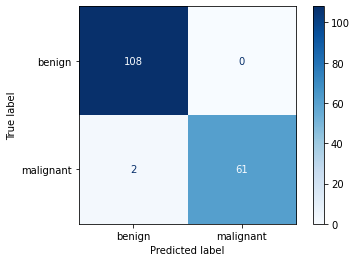

In [158]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score

# Confusion matrix
plot_confusion_matrix(svc, X_test, y_test, cmap=plt.cm.Blues)

In [189]:
# Feature importances in logistic regression
feature_names = X_test.columns
feat=[]
imp=[]

# get importance
importance = lr.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature %0d: %s\nScore: %.5f\n' % (i, feature_names[i],v))
    feat.append(feature_names[i])
    imp.append(v)

Feature 0: mean radius
Score: 0.48435

Feature 1: mean texture
Score: 0.41049

Feature 2: mean perimeter
Score: 0.43109

Feature 3: mean area
Score: 0.46308

Feature 4: mean compactness
Score: -0.99140

Feature 5: mean concavity
Score: 0.22614

Feature 6: mean concave points
Score: 1.31472

Feature 7: radius error
Score: 1.20573

Feature 8: perimeter error
Score: 0.61977

Feature 9: area error
Score: 0.84387

Feature 10: concave points error
Score: -0.30692

Feature 11: worst radius
Score: 0.93815

Feature 12: worst texture
Score: 1.14885

Feature 13: worst perimeter
Score: 0.67071

Feature 14: worst area
Score: 0.82504

Feature 15: worst smoothness
Score: 0.92517

Feature 16: worst compactness
Score: -0.39365

Feature 17: worst concavity
Score: 0.80706

Feature 18: worst concave points
Score: 1.18944

Feature 19: worst fractal dimension
Score: 0.80349



<BarContainer object of 20 artists>

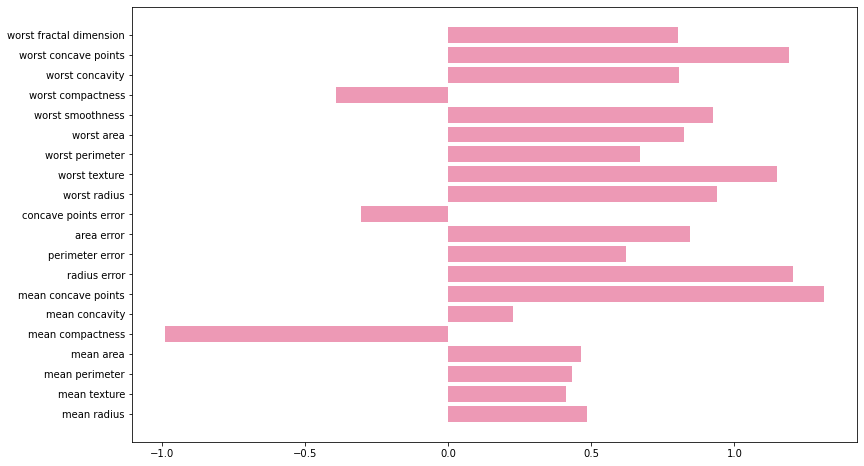

In [203]:
plt.subplots(figsize=(13,8))
plt.barh(feat,imp, color=palette[1])